## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

AttributeError: 'tuple' object has no attribute 'MinMaxScaler'

In [39]:
## 資料前處理
"""
Your code here
"""
#improt preprocessing from sklearn
from sklearn import preprocessing
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
# MinMax Scaler -1,1
        x=preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [40]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [41]:
x_train

array([[-0.5372549 , -0.51372549, -0.50588235, ..., -0.03529412,
        -0.27843137, -0.43529412],
       [ 0.20784314,  0.38823529,  0.46666667, ...,  0.12156863,
         0.04313725,  0.12941176],
       [ 1.        ,  1.        ,  1.        , ..., -0.37254902,
        -0.3254902 , -0.34117647],
       ...,
       [-0.7254902 ,  0.39607843,  0.84313725, ..., -0.90588235,
        -0.75686275, -0.60784314],
       [ 0.48235294,  0.65490196,  0.88235294, ...,  0.52941176,
         0.49019608,  0.34117647],
       [ 0.79607843,  0.79607843,  0.8745098 , ...,  0.27843137,
         0.27843137,  0.2627451 ]])

In [42]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model=build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330 

In [43]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [44]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [45]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 11s 224us/step - loss: 1.7395 - accuracy: 0.3832 - val_loss: 1.5620 - val_accuracy: 0.4535
Epoch 2/100
50000/50000 [==============================] - 11s 221us/step - loss: 1.5018 - accuracy: 0.4719 - val_loss: 1.4699 - val_accuracy: 0.4858
Epoch 3/100
50000/50000 [==============================] - 12s 233us/step - loss: 1.3762 - accuracy: 0.5167 - val_loss: 1.4086 - val_accuracy: 0.5053
Epoch 4/100
50000/50000 [==============================] - 11s 224us/step - loss: 1.2797 - accuracy: 0.5503 - val_loss: 1.4104 - val_accuracy: 0.5011
Epoch 5/100
50000/50000 [==============================] - 11s 227us/step - loss: 1.1981 - accuracy: 0.5805 - val_loss: 1.3898 - val_accuracy: 0.5228
Epoch 6/100
50000/50000 [==============================] - 11s 227us/step - loss: 1.1214 - accuracy: 0.6078 - val_loss: 1.3810 - val_accuracy: 0.5232
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 10s 206us/step - loss: 0.1075 - accuracy: 0.9647 - val_loss: 3.8989 - val_accuracy: 0.5297
Epoch 56/100
50000/50000 [==============================] - 10s 203us/step - loss: 0.0745 - accuracy: 0.9752 - val_loss: 4.0209 - val_accuracy: 0.5330
Epoch 57/100
50000/50000 [==============================] - 10s 204us/step - loss: 0.1028 - accuracy: 0.9660 - val_loss: 4.0418 - val_accuracy: 0.5223
Epoch 58/100
50000/50000 [==============================] - 10s 201us/step - loss: 0.1137 - accuracy: 0.9630 - val_loss: 3.8955 - val_accuracy: 0.5354
Epoch 59/100
50000/50000 [==============================] - 10s 210us/step - loss: 0.0799 - accuracy: 0.9732 - val_loss: 4.0564 - val_accuracy: 0.5291
Epoch 60/100
50000/50000 [==============================] - 12s 235us/step - loss: 0.0887 - accuracy: 0.9706 - val_loss: 4.1545 - val_accuracy: 0.5224
Epoch 61/100
50000/50000 [==============================] - 11s 212us/step - loss: 0.1231 - ac

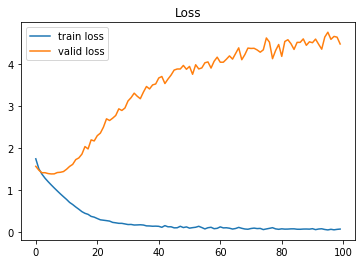

In [47]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()



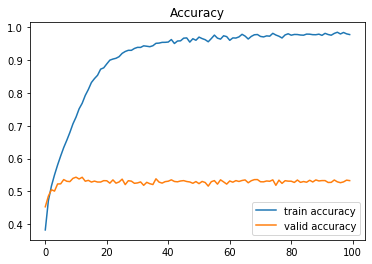

In [48]:
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()